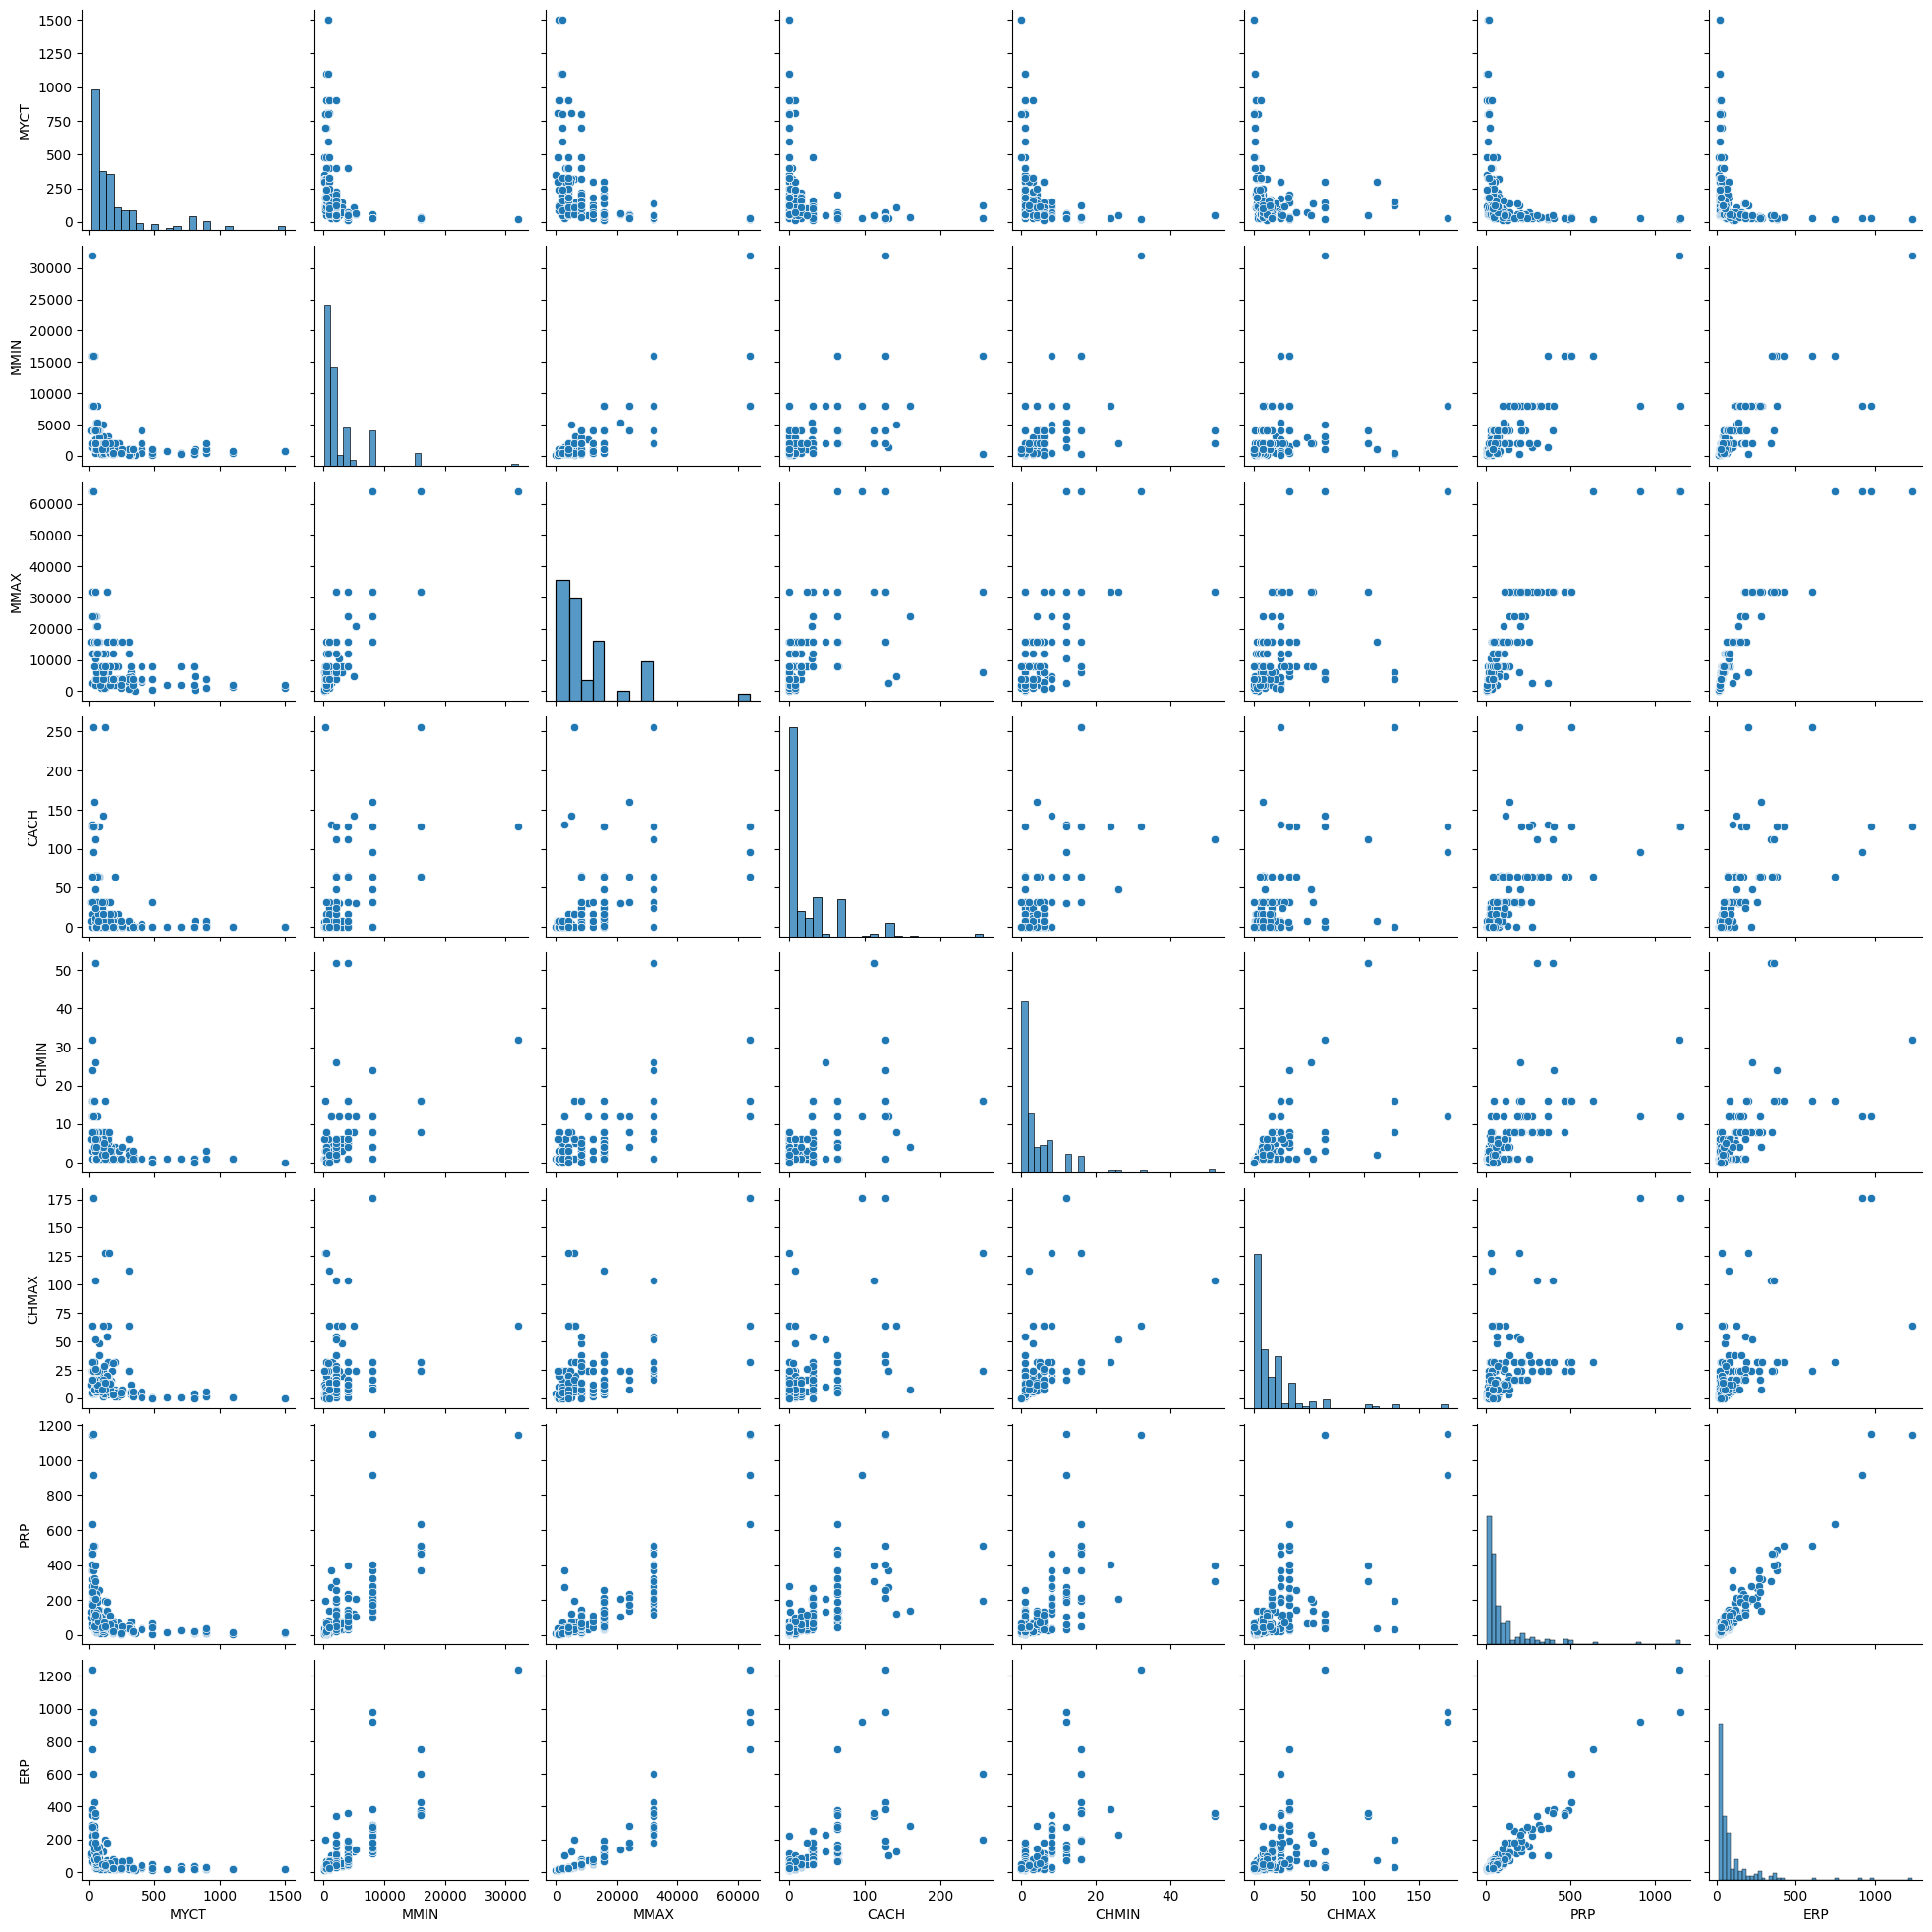

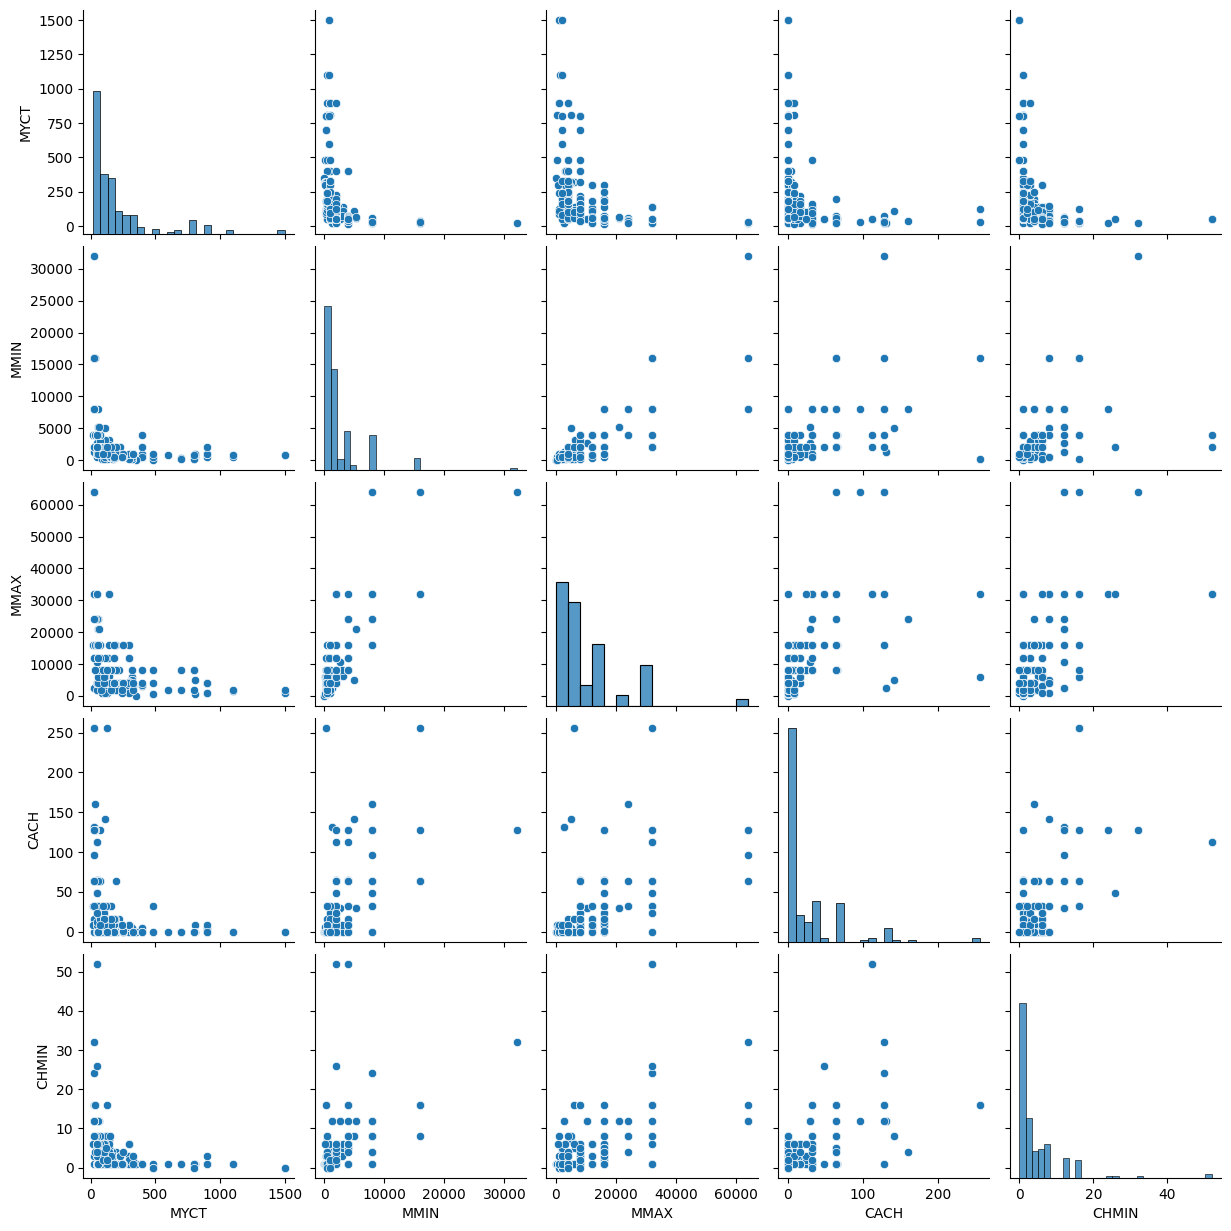

'MYCT','MMIN','MMAX','CACH','CHMIN' 일 때 cv_scores:  [0.61997757 0.38074452 0.87292339 0.84110127 0.79548395]
전부 포함일 때 cv_scores:  [0.84668228 0.81524487 0.7068735  0.91374067 0.9170715 ]
전부 포함 / test size = 0.5 cv_scores:  [0.91766656 0.81325785 0.94161967 0.96872682 0.87368131]

case 3)
train data 성능: 
MSE: 1.9465352160569667e-22
R^2: 1.0
MAE: 1.0560048562087313e-11

test data 성능: 
MSE: 3411.490500988228
R^2: 0.9090504239289143
MAE: 29.21231451968687

 case 3 분석결과 시각화


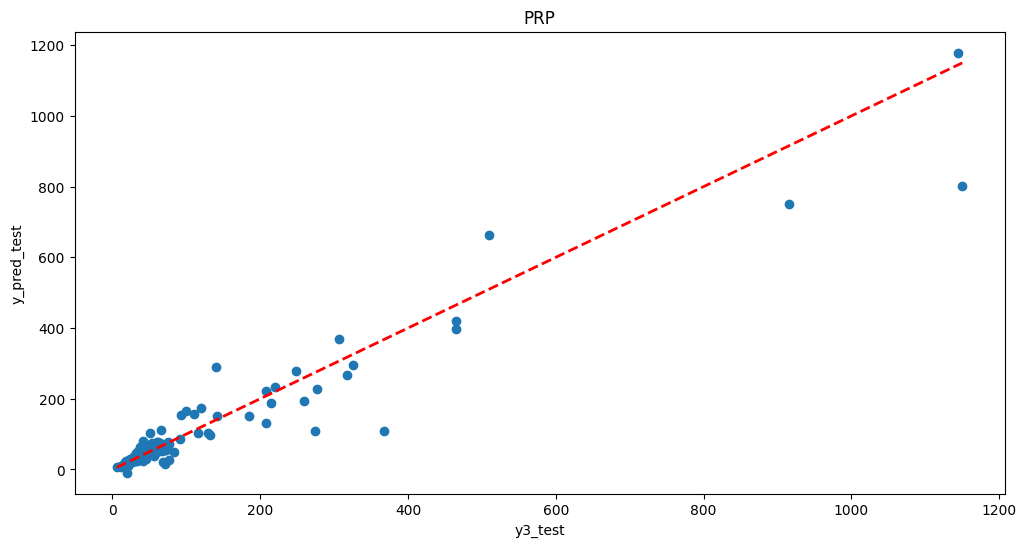

In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression

# 데이터셋 로드
df = pd.read_csv("machine.data_update.csv")

df.dropna(inplace=True)

dum_v = pd.get_dummies(df['VendorName'], prefix='v', dtype=float)
dum_m = pd.get_dummies(df['ModelName'], prefix='m', dtype=float)
df = pd.concat([df.drop(['VendorName', 'ModelName'], axis=1), dum_v, dum_m], axis =1)

# (1) 기대수명('Life expectancy')에 관련된 다른 특성들과의 상관계수 값만을 출력
result = df.corr()['PRP'] #상관계수 
result = np.abs(result)
result.sort_values(ascending=False)

features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

sns.pairplot(df[features])
plt.show()

high_features = result.index[:5]  
sns.pairplot(df[high_features])
plt.show() #상관계수가 가장 높은 것 5개 ==> MYCT, MMIN, MMAX, CACH, CHMIN

#X, y 설정
X = df[['MYCT','MMIN','MMAX','CACH','CHMIN']]
y = df['PRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

#교차검증으로 모델 확인
cv_1 =  cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
print("'MYCT','MMIN','MMAX','CACH','CHMIN' 일 때 cv_scores: ", cv_1)

# 2차 조정
X2 = df.drop('PRP', axis=1) #PRP 이외의 것들 전부 피쳐로 사용
y = df['PRP']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
cv_2 = cross_val_score(model, X2_train, y2_train, cv=5, scoring="r2")
print("전부 포함일 때 cv_scores: ", cv_2)

# 3차 조정 :: 테스트-트레이닝 비율 조정
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y, test_size=0.5, random_state=42)
cv_3 = cross_val_score(model, X3_train, y3_train, cv=5, scoring="r2")
print("전부 포함 / test size = 0.5 cv_scores: ", cv_3)

# 3차 조정 결과 선택

model.fit(X3_train, y3_train)

y_pred_train = model.predict(X3_train)
y_pred_test = model.predict(X3_test)

# # 검증
print()
print("case 3)")
print("train data 성능: ")
print("MSE:", mean_squared_error(y3_train, y_pred_train))
print("R^2:", r2_score(y3_train, y_pred_train))
print("MAE:", mean_absolute_error(y3_train, y_pred_train))
print()
print("test data 성능: ")
print("MSE:", mean_squared_error(y3_test, y_pred_test))
print("R^2:", r2_score(y3_test, y_pred_test))
print("MAE:", mean_absolute_error(y3_test, y_pred_test))

print("\n case 3 분석결과 시각화")
plt.figure(figsize=(12,6))
plt.scatter(y3_test, y_pred_test)
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'r--', lw=2)
plt.xlabel("y3_test")
plt.ylabel("y_pred_test")
plt.title("PRP")
plt.show()